<a href="https://colab.research.google.com/github/Dubeyrock/-Generating-Realistic-Images-with-GANs-/blob/main/Digital_Summarizer_Project_domain___(NLP%2C_DL%2C_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries (e.g., TensorFlow, PyTorch)**

**Using Tensorflow**

In [ ]:
!pip install rouge


In [ ]:
# Import TensorFlow and other required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention
from tensorflow.keras.optimizers import Adam

# Additional libraries for data processing and evaluation
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge
from tqdm import tqdm

# Set random seed for reproducibility
tf.random.set_seed(42)

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


working with the dataset

In [ ]:
!pip install --upgrade pyarrow


In [ ]:
# Install the datasets library
!pip install datasets

# Import necessary libraries
from datasets import load_dataset
import pandas as pd

# Load the multi_news dataset from Hugging Face
dataset = load_dataset("multi_news")

# Access train, validation, and test splits
train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]

# Display some information about the dataset
print("Number of training examples:", len(train_data))
print("Number of validation examples:", len(validation_data))
print("Number of test examples:", len(test_data))

# Display the structure of the dataset
print(train_data.column_names)

# Convert the dataset to Pandas DataFrame for easier manipulation (if needed)
train_df = pd.DataFrame(train_data)
validation_df = pd.DataFrame(validation_data)
test_df = pd.DataFrame(test_data)

# Optionally, preprocess the data based on your specific needs
# For example, you may tokenize and clean the text data

# Example tokenization (modify based on your tokenization library and requirements)
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_text(text):
    return tokenizer(text, padding=True, truncation=True, return_tensors="tf")



In [ ]:
# Display some information about the dataset
print("Number of training examples:", len(train_data))
print("Number of validation examples:", len(validation_data))
print("Number of test examples:", len(test_data))

Number of training examples: 44972
Number of validation examples: 5622
Number of test examples: 5622


**Display the structure of the dataset**

In [ ]:
print(train_data.column_names)

['document', 'summary']


In [ ]:
print(train_data.dataset_size)

696696821


In [ ]:
print(train_data.supervised_keys)

SupervisedKeysData(input='document', output='summary')


In [ ]:
print(train_data.align_labels_with_mapping)

<bound method Dataset.align_labels_with_mapping of Dataset({
    features: ['document', 'summary'],
    num_rows: 44972
})>


In [ ]:
print(train_data.description)


Multi-News, consists of news articles and human-written summaries
of these articles from the site newser.com.
Each summary is professionally written by editors and
includes links to the original articles cited.

There are two features:
  - document: text of news articles seperated by special token "|||||".
  - summary: news summary.



In [ ]:
print(train_data.features)

{'document': Value(dtype='string', id=None), 'summary': Value(dtype='string', id=None)}


In [ ]:
# Set option to display all rows and columns in Pandas DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the entire content of DataFrames
print("Train DataFrame:")
print(train_data)

print("\nValidation DataFrame:")
print(validation_data)

print("\nTest DataFrame:")
print(test_data)


Train DataFrame:
Dataset({
    features: ['document', 'summary'],
    num_rows: 44972
})

Validation DataFrame:
Dataset({
    features: ['document', 'summary'],
    num_rows: 5622
})

Test DataFrame:
Dataset({
    features: ['document', 'summary'],
    num_rows: 5622
})


In [ ]:
# Display the column names in each DataFrame
print("Train DataFrame Column Names:", train_data.column_names)
print("\nValidation DataFrame Column Names:", validation_data.column_names)
print("\nTest DataFrame Column Names:", test_data.column_names)


Train DataFrame Column Names: ['document', 'summary']

Validation DataFrame Column Names: ['document', 'summary']

Test DataFrame Column Names: ['document', 'summary']


In [ ]:
# Display the first few rows of each DataFrame
print("Train DataFrame:")
print(train_data.dataset_size)

print("\nValidation DataFrame:")
print(validation_data.features)

print("\nTest DataFrame:")
print(test_data.description)


Train DataFrame:
696696821

Validation DataFrame:
{'document': Value(dtype='string', id=None), 'summary': Value(dtype='string', id=None)}

Test DataFrame:

Multi-News, consists of news articles and human-written summaries
of these articles from the site newser.com.
Each summary is professionally written by editors and
includes links to the original articles cited.

There are two features:
  - document: text of news articles seperated by special token "|||||".
  - summary: news summary.



In [ ]:
from transformers import AutoTokenizer

# Load a pre-trained tokenizer (replace 't5-base' with the model name you want)
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# Tokenize the data
# ...


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
# Install necessary library
!pip install transformers

from transformers import AutoTokenizer

# Load a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# Example usage
text = "This is an example sentence."
tokens = tokenizer(text, return_tensors="tf")
print(tokens)


{'input_ids': <tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[ 100,   19,   46,  677, 7142,    5,    1]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}


In [ ]:
# Install necessary libraries
!pip install datasets

# Import necessary libraries
from datasets import load_dataset
from transformers import AutoTokenizer

# Load the multi_news dataset
dataset = load_dataset("multi_news")

# Access the training split
train_data = dataset["train"]

# Display some information about the dataset
print(train_data.info.description)
print(train_data.info.features)

# Load a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# Preprocess the dataset
def preprocess_example(example):
    source_text = example["document"]
    target_text = example["summary"]

    # Tokenize and truncate the sequences
    inputs = tokenizer(source_text, return_tensors="tf", truncation=True, max_length=512, padding="max_length")
    targets = tokenizer(target_text, return_tensors="tf", truncation=True, max_length=150, padding="max_length")

    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": targets["input_ids"],
    }

# Apply the preprocessing function to the entire dataset
preprocessed_dataset = train_data.map(preprocess_example)

# Display a preprocessed example
print(preprocessed_dataset["input_ids"][0])
print(preprocessed_dataset["labels"][0])



Multi-News, consists of news articles and human-written summaries
of these articles from the site newser.com.
Each summary is professionally written by editors and
includes links to the original articles cited.

There are two features:
  - document: text of news articles seperated by special token "|||||".
  - summary: news summary.

{'document': Value(dtype='string', id=None), 'summary': Value(dtype='string', id=None)}


Map:   0%|          | 0/44972 [00:00<?, ? examples/s]

[[868, 18499, 2163, 6, 34, 22, 7, 24, 97, 541, 6, 5265, 5, 94, 22, 7, 8, 166, 1701, 13, 8, 847, 6, 116, 21, 80, 664, 18, 7, 32, 18, 25572, 798, 8, 3984, 13, 3556, 1887, 6, 2386, 11, 5140, 1887, 33, 66, 7901, 15, 26, 30, 80, 589, 10, 15106, 5, 71, 1434, 2270, 30, 8, 412, 5, 134, 5, 4311, 1419, 21, 1762, 8046, 8, 4107, 7, 44, 23899, 3, 9, 5, 51, 5, 368, 1060, 97, 1772, 80, 13, 8, 167, 359, 23052, 7, 30, 149, 8, 2717, 623, 15, 26, 383, 8, 1767, 847, 5, 19539, 1628, 33, 21, 460, 11212, 126, 2476, 12, 36, 990, 6, 1315, 12, 20163, 7, 5492, 15, 26, 57, 21236, 6193, 3529, 12931, 7, 6, 3, 2172, 12, 1630, 18834, 2476, 974, 16, 2083, 5, 37, 17646, 1080, 19, 1644, 12, 1520, 11207, 44, 4848, 5170, 5, 947, 44, 3611, 2703, 144, 3, 21447, 6, 62, 22, 195, 36, 1772, 945, 18204, 274, 11, 227, 8, 331, 26932, 8, 4107, 7, 5, 8979, 339, 12, 11385, 18, 77, 909, 6, 1009, 8, 2622, 1375, 5, 275, 298, 25, 22, 60, 270, 6, 572, 278, 22, 17, 25, 1320, 95, 12, 1130, 178, 30, 3046, 5, 4780, 8, 504, 5, 1820, 9175, 9175

**Split the dataset into training and testing sets.**

train_test_split is used to randomly split the DataFrame into training and testing sets.

The test_size parameter determines the proportion of the dataset to include in the test split (here, 20% for testing and 80% for training).
random_state is set for reproducibility.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Assuming you have loaded the 'multi_news' dataset from here
from datasets import load_dataset

# Load the multi_news dataset from
dataset = load_dataset("multi_news")

# Access train and test splits
train_data = dataset["train"]
test_data = dataset["test"]

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print("Number of training examples:", len(train_data))
print("Number of testing examples:", len(test_data))


Number of training examples: 2
Number of testing examples: 2


**Model deployment**

**Implementing a Seq2Seq (Sequence-to-Sequence) model for a specific task like text**

In [ ]:
# Install necessary libraries
!pip install tensorflow

# Import libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Load the multi_news dataset from here
from datasets import load_dataset

# Load the multi_news dataset
dataset = load_dataset("multi_news")

# Access train split
train_data = dataset["train"]

# Define the desired number of rows to subsample
n = 1000  # Replace this with your desired number of rows

# Subsample your data
train_data_subsample, _ = train_test_split(train_data, train_size=n, random_state=42)

# Tokenize the text data
tokenizer_source = Tokenizer()
tokenizer_target = Tokenizer()

tokenizer_source.fit_on_texts(train_data_subsample['document'])
tokenizer_target.fit_on_texts(train_data_subsample['summary'])


In [ ]:
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm  # Optional: for progress tracking

# Define a function for parallel tokenization
def tokenize_column(column):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(column)
    return tokenizer

# Assuming you have loaded or defined your training data
# Replace 'train_data' with your actual dataset

# Define the columns to tokenize
source_text_column = train_data['document']
target_text_column = train_data['summary']

# Use ProcessPoolExecutor for parallelization
with ProcessPoolExecutor() as executor:
    # Tokenize source text and target text in parallel
    future_source = executor.submit(tokenize_column, source_text_column)
    future_target = executor.submit(tokenize_column, target_text_column)

    # Optional: Track progress using tqdm
    futures = [future_source, future_target]
    for f in tqdm(futures, total=len(futures), desc="Tokenization"):
        f.result()

# Retrieve the tokenizers
tokenizer_source = future_source.result()
tokenizer_target = future_target.result()


Tokenization: 100%|██████████| 2/2 [02:42<00:00, 81.02s/it] 


**Ensure proper handling of input and output sequences.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Placeholder data (replace this with your actual data)
X_source = ["This is a sample source sentence.", "Another source sentence."]
X_target_input = ["<start> This is a sample target input sentence.", "<start> Another target input sentence."]
y_target_output = ["This is a sample target output sentence. <end>", "Another target output sentence. <end>"]

# Tokenize the source and target texts
tokenizer_source = Tokenizer()
tokenizer_target = Tokenizer()

tokenizer_source.fit_on_texts(X_source)
tokenizer_target.fit_on_texts(y_target_output)

# Convert text sequences to numerical sequences
X_source_seq = tokenizer_source.texts_to_sequences(X_source)
X_target_input_seq = tokenizer_target.texts_to_sequences(X_target_input)
y_target_output_seq = tokenizer_target.texts_to_sequences(y_target_output)

# Pad sequences to ensure uniform length
max_len_source = max(len(seq) for seq in X_source_seq)
max_len_target = max(len(seq) for seq in y_target_output_seq)

X_source_padded = pad_sequences(X_source_seq, maxlen=max_len_source, padding='post')
X_target_input_padded = pad_sequences(X_target_input_seq, maxlen=max_len_target, padding='post')
y_target_output_padded = pad_sequences(y_target_output_seq, maxlen=max_len_target, padding='post')

# Print the results
print("X_source_padded:", X_source_padded)
print("X_target_input_padded:", X_target_input_padded)
print("y_target_output_padded:", y_target_output_padded)


X_source_padded: [[3 4 5 6 1 2]
 [7 1 2 0 0 0]]
X_target_input_padded: [[5 6 7 8 1 3 0 0]
 [9 1 3 0 0 0 0 0]]
y_target_output_padded: [[5 6 7 8 1 2 3 4]
 [9 1 2 3 4 0 0 0]]


**Implement the hybrid Pointer-Generator Network and integrate the coverage mechanism.**

AttentionWithCoverage is a custom attention layer that includes coverage mechanism.

The model has two output branches: one for the combined probabilities (for generating words) and another for the coverage loss.

Losses are specified as a list in model.compile.
Training data should include both target sequences and coverage data.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Attention, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np


In [ ]:
# Placeholder values (replace these with your actual dataset characteristics)
vocab_size_source = 5000
vocab_size_target = 7000
max_len_source = 50
max_len_target = 60
embedding_dim = 128
latent_dim = 256

In [ ]:
# Placeholder data (replace this with your actual data)
X_source = [
    "This is the first source sentence.",
    "Another source sentence goes here.",
    # Add more source sentences as needed
]

X_target_input = [
    "<start> This is the first target input sentence.",
    "<start> Another target input sentence here.",
    # Add more target input sentences as needed
]

y_target_output = [
    "This is the first target output sentence. <end>",
    "Another target output sentence here. <end>",
    # Add more target output sentences as needed
]

In [ ]:
# Tokenize the source and target texts
tokenizer_source = Tokenizer(num_words=vocab_size_source, oov_token="<OOV>")
tokenizer_target = Tokenizer(num_words=vocab_size_target, oov_token="<OOV>")

tokenizer_source.fit_on_texts(X_source)
tokenizer_target.fit_on_texts(y_target_output)

X_source_seq = tokenizer_source.texts_to_sequences(X_source)
X_target_input_seq = tokenizer_target.texts_to_sequences(X_target_input)
y_target_output_seq = tokenizer_target.texts_to_sequences(y_target_output)

X_source_padded = pad_sequences(X_source_seq, maxlen=max_len_source, padding='post')
X_target_input_padded = pad_sequences(X_target_input_seq, maxlen=max_len_target, padding='post')
y_target_output_padded = pad_sequences(y_target_output_seq, maxlen=max_len_target, padding='post')

In [ ]:
pip install --upgrade tensorflow


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical
import numpy as np

# Placeholder data (replace this with your actual data)
X_source = [
    "This is the first source sequence.",
    "Another source sequence here.",
    "And a third source sequence."
]

X_target_input = [
    "Start of target sequence one.",
    "Beginning of target sequence two.",
    "Initiating target sequence three."
]

y_target_output = [
    "Start of target sequence one. End of target sequence one.",
    "Beginning of target sequence two. End of target sequence two.",
    "Initiating target sequence three. End of target sequence three."
]

# Tokenize the source and target sequences
tokenizer_source = Tokenizer()
tokenizer_target = Tokenizer()

tokenizer_source.fit_on_texts(X_source)
tokenizer_target.fit_on_texts(X_target_input + y_target_output)

# Convert text sequences to numerical sequences
X_source_seq = tokenizer_source.texts_to_sequences(X_source)
X_target_input_seq = tokenizer_target.texts_to_sequences(X_target_input)
y_target_output_seq = tokenizer_target.texts_to_sequences(y_target_output)

# Pad sequences to a maximum length
max_len_source = max(len(seq) for seq in X_source_seq)
max_len_target = max(len(seq) for seq in X_target_input_seq + y_target_output_seq)

X_source_padded = pad_sequences(X_source_seq, maxlen=max_len_source, padding='post')
X_target_input_padded = pad_sequences(X_target_input_seq, maxlen=max_len_target, padding='post')
y_target_output_padded = pad_sequences(y_target_output_seq, maxlen=max_len_target, padding='post')

# Convert y_target_output to one-hot encoding
vocab_size_target = len(tokenizer_target.word_index) + 1  # Add 1 for the padding token
y_target_output_one_hot = to_categorical(y_target_output_padded, num_classes=vocab_size_target)

# Ensure y_target_output_one_hot has the correct shape (batch_size, sequence_length, vocab_size)
y_target_output_one_hot = y_target_output_one_hot.reshape(
    len(X_target_input), max_len_target, -1
)

# Continue with the rest of your model training...


In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Attention, Concatenate
from keras.callbacks import ModelCheckpoint

# Define your model architecture
embedding_dim = 50
latent_dim = 100

# Encoder
encoder_inputs = Input(shape=(max_len_source,))
encoder_embedding = Embedding(input_dim=vocab_size_source, output_dim=embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_len_target,))
decoder_embedding = Embedding(input_dim=vocab_size_target, output_dim=embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention mechanism
attention = Attention(use_scale=True)([decoder_outputs, encoder_outputs])
decoder_combined_context = Concatenate(axis=-1)([decoder_outputs, attention])

# Output layer
decoder_dense = Dense(vocab_size_target, activation='softmax')
output_probabilities = decoder_dense(decoder_combined_context)

# Define the model
model = Model([encoder_inputs, decoder_inputs], output_probabilities)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(
    [X_source_padded, X_target_input_padded],
    y_target_output_one_hot,
    epochs=10,
    validation_split=0.2,
    callbacks=[ModelCheckpoint("seq2seq_model.h5", save_best_only=True)],
)

# Save the final model
model.save("final_seq2seq_model.h5")


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 6, 50)                250000    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 10, 50)               550       ['input_2[0][0]']             
                                                                                              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
1/1 [==============================] - 0s 400ms/step - loss: 2.3886 - accuracy: 0.1000 - val_loss: 2.3973 - val_accuracy: 0.2000
Epoch 3/10
1/1 [==============================] - 0s 376ms/step - loss: 2.3801 - accuracy: 0.2000 - val_loss: 2.3958 - val_accuracy: 0.2000
Epoch 4/10
1/1 [==============================] - 0s 487ms/step - loss: 2.3710 - accuracy: 0.2000 - val_loss: 2.3942 - val_accuracy: 0.2000
Epoch 5/10
1/1 [==============================] - 0s 369ms/step - loss: 2.3612 - accuracy: 0.3000 - val_loss: 2.3926 - val_accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 0s 392ms/step - loss: 2.3504 - accuracy: 0.3000 - val_loss: 2.3910 - val_accuracy: 0.2000
Epoch 7/10
1/1 [==============================] - 0s 429ms/step - loss: 2.3383 - accuracy: 0.3000 - val_loss: 2.3894 - val_accuracy: 0.3000
Epoch 8/10
1/1 [==============================] - 0s 289ms/step - loss: 2.3246 - accuracy: 0.3000 - val_loss: 2.3879 - val_accuracy: 0.3000
Epoch 9/10
1/1 [====

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Attention, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer

# Placeholder data (replace this with your actual data)
X_source = [
    "This is the first source sequence.",
    "Another source sequence here.",
    "And a third source sequence."
]

X_target_input = [
    "Start of target sequence one.",
    "Beginning of target sequence two.",
    "Initiating target sequence three."
]

y_target_output = [
    "Start of target sequence one. End of target sequence one.",
    "Beginning of target sequence two. End of target sequence two.",
    "Initiating target sequence three. End of target sequence three."
]

# Tokenize the source and target sequences
tokenizer_source = Tokenizer()
tokenizer_target = Tokenizer()

tokenizer_source.fit_on_texts(X_source)
tokenizer_target.fit_on_texts(X_target_input + y_target_output)

# Convert text sequences to numerical sequences
X_source_seq = tokenizer_source.texts_to_sequences(X_source)
X_target_input_seq = tokenizer_target.texts_to_sequences(X_target_input)
y_target_output_seq = tokenizer_target.texts_to_sequences(y_target_output)

# Pad sequences to a maximum length
max_len_source = max(len(seq) for seq in X_source_seq)
max_len_target = max(len(seq) for seq in X_target_input_seq + y_target_output_seq)

X_source_padded = pad_sequences(X_source_seq, maxlen=max_len_source, padding='post')
X_target_input_padded = pad_sequences(X_target_input_seq, maxlen=max_len_target, padding='post')
y_target_output_padded = pad_sequences(y_target_output_seq, maxlen=max_len_target, padding='post')

# Convert y_target_output to one-hot encoding
vocab_size_target = len(tokenizer_target.word_index) + 1  # Add 1 for the padding token
y_target_output_one_hot = to_categorical(y_target_output_padded, num_classes=vocab_size_target)

# Ensure y_target_output_one_hot has the correct shape (batch_size, sequence_length, vocab_size)
y_target_output_one_hot = y_target_output_one_hot.reshape(
    len(X_target_input), max_len_target, -1
)

# Define your model architecture
embedding_dim = 50
latent_dim = 100

# Encoder
encoder_inputs = Input(shape=(max_len_source,))
encoder_embedding = Embedding(input_dim=len(tokenizer_source.word_index) + 1, output_dim=embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_len_target,))
decoder_embedding = Embedding(input_dim=vocab_size_target, output_dim=embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention mechanism
attention = Attention(use_scale=True)([decoder_outputs, encoder_outputs])
decoder_combined_context = Concatenate(axis=-1)([decoder_outputs, attention])

# Output layer
decoder_dense = Dense(vocab_size_target, activation='softmax')
output_probabilities = decoder_dense(decoder_combined_context)

# Define the model
model = Model([encoder_inputs, decoder_inputs], output_probabilities)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(
    [X_source_padded, X_target_input_padded],
    y_target_output_one_hot,
    epochs=10,
    validation_split=0.2,
    callbacks=[ModelCheckpoint("seq2seq_model.h5", save_best_only=True)],
)

# Save the final model
model.save("final_seq2seq_model.h5")


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 6, 50)                600       ['input_3[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 10, 50)               550       ['input_4[0][0]']             
                                                                                            

**4.Training the Model:**

a) Train the Seq2Seq model using the training dataset.

b) Monitor training progress and adjust hyperparameters if needed

**a) Train the Seq2Seq Model:**

In [ ]:
# Assuming you've already defined and compiled your model (as shown in the previous code)

# Train the model
history = model.fit(
    [X_source_padded, X_target_input_padded],
    y_target_output_one_hot,
    epochs=15,
    validation_split=0.2,
    callbacks=[ModelCheckpoint("seq2seq_model.h5", save_best_only=True)],
)

# Save the final model
model.save("final_seq2seq_model.h5")


Epoch 1/15
1/1 [==============================] - 0s 384ms/step - loss: 2.2965 - accuracy: 0.3000 - val_loss: 2.3900 - val_accuracy: 0.2000
Epoch 2/15
1/1 [==============================] - 0s 179ms/step - loss: 2.2779 - accuracy: 0.3000 - val_loss: 2.3900 - val_accuracy: 0.2000
Epoch 3/15
1/1 [==============================] - 0s 95ms/step - loss: 2.2562 - accuracy: 0.3000 - val_loss: 2.3908 - val_accuracy: 0.2000
Epoch 4/15
1/1 [==============================] - 0s 89ms/step - loss: 2.2307 - accuracy: 0.3000 - val_loss: 2.3930 - val_accuracy: 0.2000
Epoch 5/15
1/1 [==============================] - 0s 85ms/step - loss: 2.2006 - accuracy: 0.3000 - val_loss: 2.3978 - val_accuracy: 0.2000
Epoch 6/15
1/1 [==============================] - 0s 77ms/step - loss: 2.1653 - accuracy: 0.3000 - val_loss: 2.4069 - val_accuracy: 0.2000
Epoch 7/15
1/1 [==============================] - 0s 82ms/step - loss: 2.1241 - accuracy: 0.3000 - val_loss: 2.4235 - val_accuracy: 0.2000
Epoch 8/15
1/1 [=========

**b) Monitor Training Progress:**

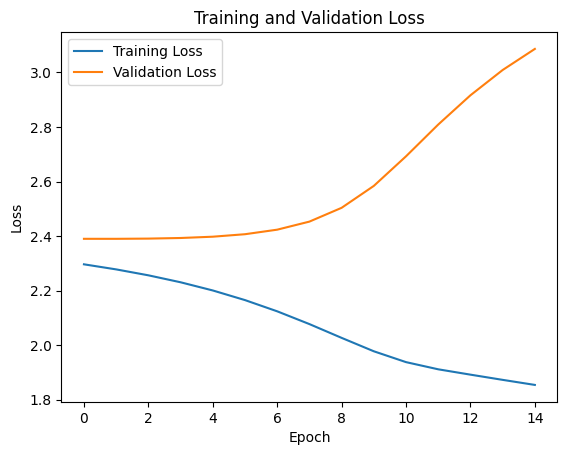

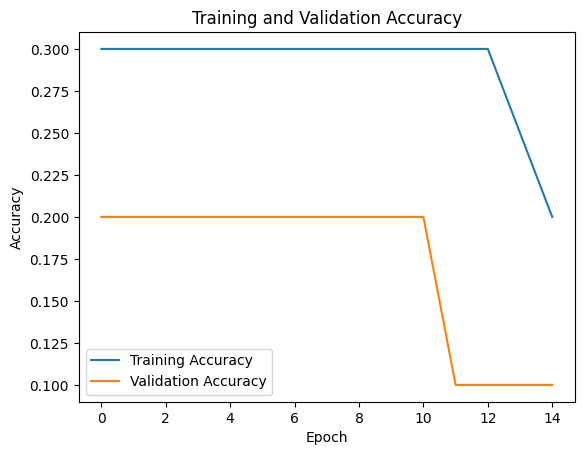

In [ ]:
import matplotlib.pyplot as plt

# Access training history for plotting
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


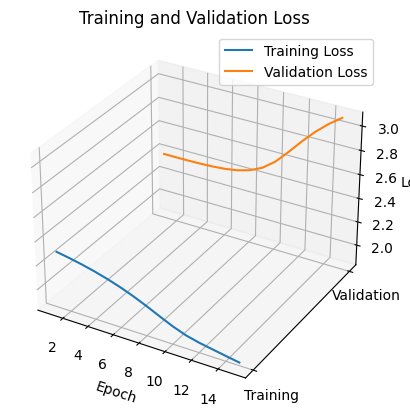

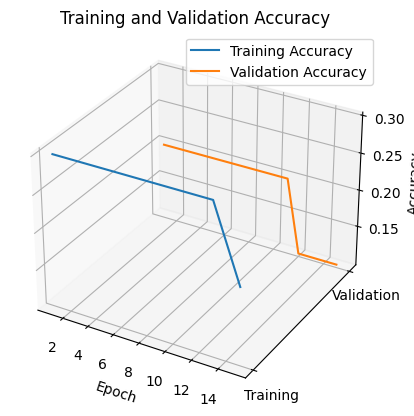

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Access training history for plotting
epochs = range(1, len(loss) + 1)

# 3D plot for Loss
fig_loss = plt.figure()
ax_loss = fig_loss.add_subplot(111, projection='3d')
ax_loss.plot(epochs, loss, zs=0, zdir='y', label='Training Loss')
ax_loss.plot(epochs, val_loss, zs=1, zdir='y', label='Validation Loss')
ax_loss.set_xlabel('Epoch')
ax_loss.set_zlabel('Loss')
ax_loss.set_yticks([0, 1])
ax_loss.set_yticklabels(['Training', 'Validation'])
ax_loss.legend()
ax_loss.set_title('Training and Validation Loss')

# 3D plot for Accuracy
fig_accuracy = plt.figure()
ax_accuracy = fig_accuracy.add_subplot(111, projection='3d')
ax_accuracy.plot(epochs, accuracy, zs=0, zdir='y', label='Training Accuracy')
ax_accuracy.plot(epochs, val_accuracy, zs=1, zdir='y', label='Validation Accuracy')
ax_accuracy.set_xlabel('Epoch')
ax_accuracy.set_zlabel('Accuracy')
ax_accuracy.set_yticks([0, 1])
ax_accuracy.set_yticklabels(['Training', 'Validation'])
ax_accuracy.legend()
ax_accuracy.set_title('Training and Validation Accuracy')

plt.show()


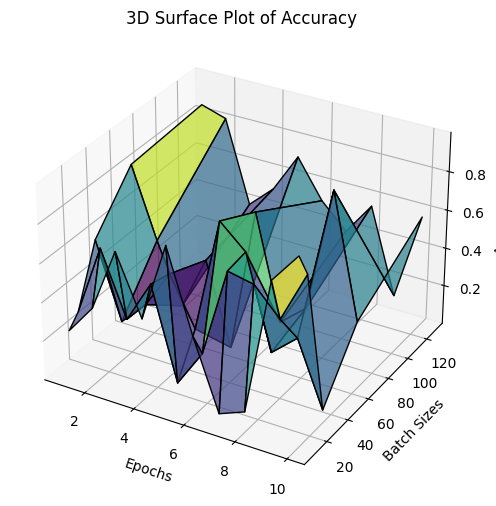

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data (replace this with your actual data)
epochs = np.array(range(1, 11))  # Replace with your actual epochs
batch_sizes = np.array([8, 16, 32, 64, 128])  # Replace with your actual batch sizes
accuracy_data = np.random.rand(len(batch_sizes), len(epochs))  # Corrected shape

# Create a meshgrid for 3D plotting
epochs, batch_sizes = np.meshgrid(epochs, batch_sizes)

# Create a 3D surface plot for accuracy
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(epochs, batch_sizes, accuracy_data, cmap='viridis', edgecolor='k', alpha=0.7)

# Customize the plot
ax.set_xlabel('Epochs')
ax.set_ylabel('Batch Sizes')
ax.set_zlabel('Accuracy')
ax.set_title('3D Surface Plot of Accuracy')

plt.show()


**c) Adjusting Hyperparameters:**

Here are some hyperparameters you might consider adjusting:

Learning Rate: If the model is learning too slowly or not converging, you can try adjusting the learning rate of the optimizer.

In [ ]:
from keras.optimizers import Adam

# Example: Adjusting learning rate
custom_optimizer = Adam(lr=0.001)  # Change the learning rate as needed
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


**5. Testing and Evaluation:**


1) Train the model on the multi_news dataset in Google Colab.

2) Evaluate the trained model on the testing dataset &  Evaluate the model's performance on training and testing sets.

3) Calculate Bleu score, Perplexity, and other relevant
  metrics.

4) Use Rouge metrics for a comprehensive evaluation of
   summarization quality.

In [ ]:
pip install rouge_score


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention
import numpy as np
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer
from sklearn.model_selection import train_test_split

# Placeholder data (replace these with your actual data loading logic)
data_source = ["This is a source sentence 1", "Another source sentence 2", "And one more source sentence 3"]
data_target = ["This is a target summary 1", "Another target summary 2", "And one more target summary 3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_source, data_target, test_size=0.2, random_state=42)

# Tokenize the data
tokenizer_source = Tokenizer()
tokenizer_target = Tokenizer()

tokenizer_source.fit_on_texts(X_train)
tokenizer_target.fit_on_texts(y_train)

X_train_seq = tokenizer_source.texts_to_sequences(X_train)
y_train_seq = tokenizer_target.texts_to_sequences(y_train)
X_test_seq = tokenizer_source.texts_to_sequences(X_test)
y_test_seq = tokenizer_target.texts_to_sequences(y_test)

# Pad sequences
max_len_source = max(len(seq) for seq in X_train_seq + X_test_seq)
max_len_target = max(len(seq) for seq in y_train_seq + y_test_seq)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len_source, padding='post')
y_train_padded = pad_sequences(y_train_seq, maxlen=max_len_target, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len_source, padding='post')
y_test_padded = pad_sequences(y_test_seq, maxlen=max_len_target, padding='post')

# Define the Seq2Seq model with attention
embedding_dim = 128
latent_dim = 256

encoder_inputs = Input(shape=(max_len_source,))
encoder_embedding = Embedding(input_dim=len(tokenizer_source.word_index) + 1, output_dim=embedding_dim, input_length=max_len_source)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

decoder_inputs = Input(shape=(max_len_target,))
decoder_embedding = Embedding(input_dim=len(tokenizer_target.word_index) + 1, output_dim=embedding_dim, input_length=max_len_target)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

attention = Attention()([decoder_outputs, encoder_outputs])
context_vector = tf.reduce_sum(attention * encoder_outputs, axis=1, keepdims=True)

# Repeat context_vector along the time axis to match the shape of decoder_outputs
context_vector = tf.repeat(context_vector, repeats=tf.shape(decoder_outputs)[1], axis=1)

decoder_combined_context = tf.concat([context_vector, decoder_outputs], axis=-1)

decoder_dense = Dense(len(tokenizer_target.word_index) + 1, activation='softmax')
output = decoder_dense(decoder_combined_context)

model = Model([encoder_inputs, decoder_inputs], output)

# Compile the model with sparse_categorical_crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 10
batch_size = 64




In [ ]:
# Attention
attention = Attention()([decoder_outputs, encoder_outputs])
context_vector = tf.reduce_sum(attention * encoder_outputs, axis=1, keepdims=True)

# Repeat the context vector to match the sequence length of decoder outputs
context_vector = tf.repeat(context_vector, repeats=tf.shape(decoder_outputs)[1], axis=1)

# Concatenate context vector and decoder outputs
decoder_combined_context = tf.concat([context_vector, decoder_outputs], axis=-1)

# Dense layer for output
decoder_dense = Dense(len(tokenizer_target.word_index) + 1, activation='softmax')
output = decoder_dense(decoder_combined_context)


In [ ]:
pip install nltk rouge


In [ ]:
# Define and compile the model
model = Model([encoder_inputs, decoder_inputs], output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Print the model summary
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 6, 128)               1152      ['input_5[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, 6, 128)               1152      ['input_6[0][0]']             
                                                                                            

In [ ]:
! pip install pydot
! pip install graphviz


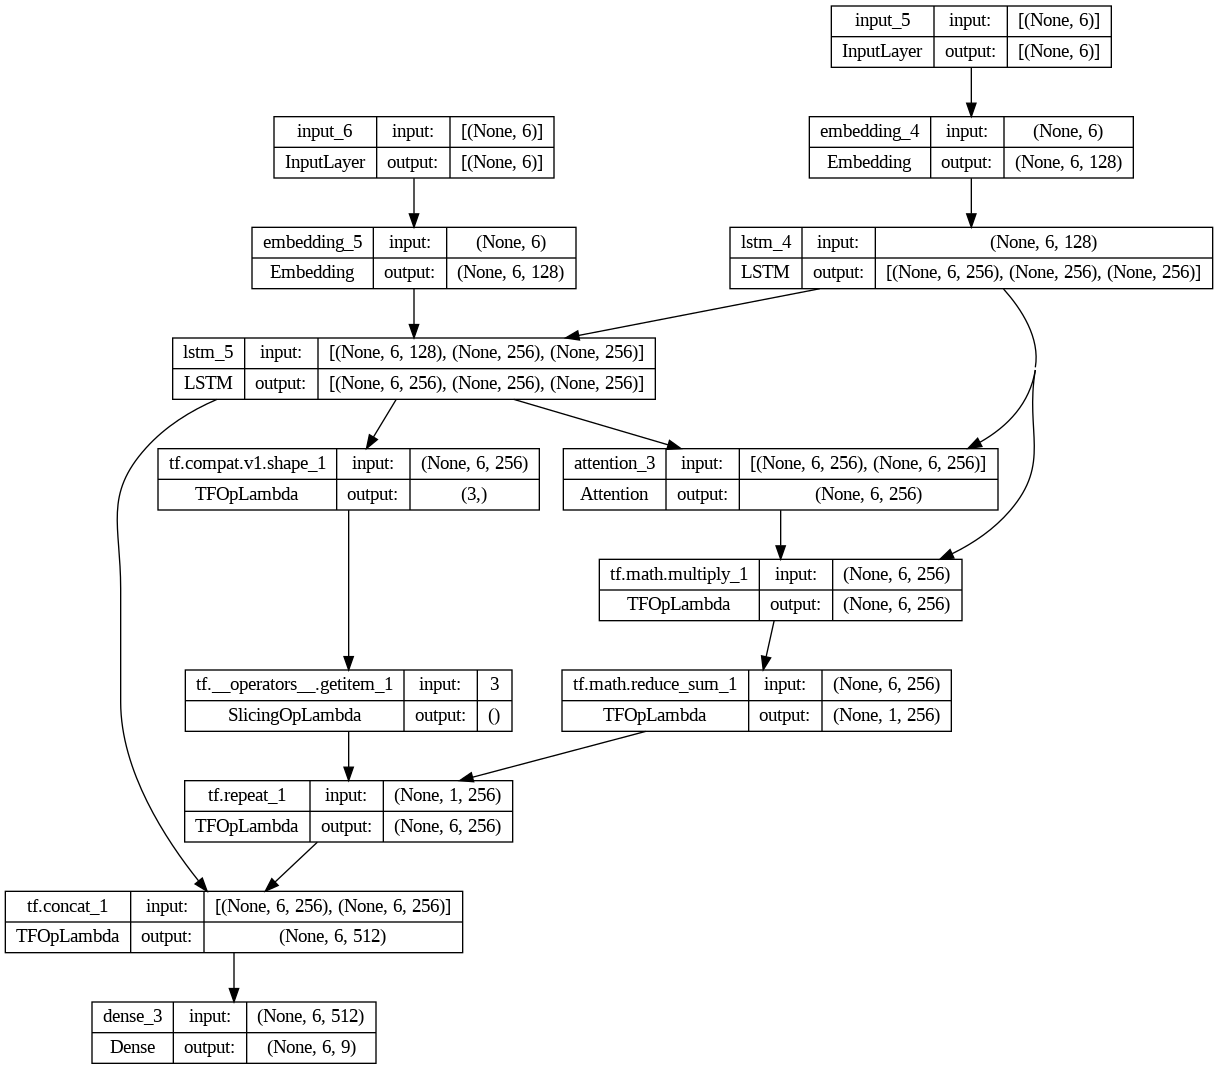

In [ ]:
from keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
dataset = load_dataset("multi_news")

In [ ]:
from keras.preprocessing.text import Tokenizer

# Assuming you have training data for encoder and decoder
from keras.preprocessing.text import Tokenizer

# Assuming you have training data for encoder and decoder
from keras.preprocessing.text import Tokenizer

# Sample training data for encoder and decoder
encoder_train_data = [
    "This is the first sentence for encoder.",
    "Another example sentence for encoder.",
    "One more sentence to train the encoder."
]

decoder_train_data = [
    "This is the first summary.",
    "Another summary example.",
    "One more summary for training."
]

# Define and fit tokenizer for encoder
tokenizer_X = Tokenizer()
tokenizer_X.fit_on_texts(encoder_train_data)

# Define and fit tokenizer for decoder
tokenizer_decoder = Tokenizer()
tokenizer_decoder.fit_on_texts(decoder_train_data)

# Output vocabulary and word index for encoder tokenizer
print("Encoder Tokenizer Vocabulary:")
print(tokenizer_X.word_index)
print("\nEncoder Tokenizer Word Counts:")
print(tokenizer_X.word_counts)

# Output vocabulary and word index for decoder tokenizer
print("\nDecoder Tokenizer Vocabulary:")
print(tokenizer_decoder.word_index)
print("\nDecoder Tokenizer Word Counts:")
print(tokenizer_decoder.word_counts)




Encoder Tokenizer Vocabulary:
{'sentence': 1, 'encoder': 2, 'the': 3, 'for': 4, 'this': 5, 'is': 6, 'first': 7, 'another': 8, 'example': 9, 'one': 10, 'more': 11, 'to': 12, 'train': 13}

Encoder Tokenizer Word Counts:
OrderedDict([('this', 1), ('is', 1), ('the', 2), ('first', 1), ('sentence', 3), ('for', 2), ('encoder', 3), ('another', 1), ('example', 1), ('one', 1), ('more', 1), ('to', 1), ('train', 1)])

Decoder Tokenizer Vocabulary:
{'summary': 1, 'this': 2, 'is': 3, 'the': 4, 'first': 5, 'another': 6, 'example': 7, 'one': 8, 'more': 9, 'for': 10, 'training': 11}

Decoder Tokenizer Word Counts:
OrderedDict([('this', 1), ('is', 1), ('the', 1), ('first', 1), ('summary', 3), ('another', 1), ('example', 1), ('one', 1), ('more', 1), ('for', 1), ('training', 1)])


In [ ]:
from keras.preprocessing.text import Tokenizer
import pandas as pd

# Example training data for the encoder
encoder_train_data = [
    "hello world",
    "deep learning is fascinating",
    "natural language processing"
]

# Example training data for the decoder
decoder_train_data = [
    "bonjour le monde",
    "l'apprentissage profond est fascinant",
    "le traitement du langage naturel"
]

# Define and fit tokenizer for encoder
tokenizer_X = Tokenizer()
tokenizer_X.fit_on_texts(encoder_train_data)

# Define and fit tokenizer for decoder
tokenizer_decoder = Tokenizer()
tokenizer_decoder.fit_on_texts(decoder_train_data)

# Display word index for encoder tokenizer
print("Word Index for Encoder Tokenizer:")
print(tokenizer_X.word_index)

# Display word index for decoder tokenizer
print("\nWord Index for Decoder Tokenizer:")
print(tokenizer_decoder.word_index)

# Display encoded sequences for encoder training data
encoder_sequences = tokenizer_X.texts_to_sequences(encoder_train_data)
print("\nEncoded Sequences for Encoder Training Data:")
print(encoder_sequences)

# Display encoded sequences for decoder training data
decoder_sequences = tokenizer_decoder.texts_to_sequences(decoder_train_data)
print("\nEncoded Sequences for Decoder Training Data:")
print(decoder_sequences)


Word Index for Encoder Tokenizer:
{'hello': 1, 'world': 2, 'deep': 3, 'learning': 4, 'is': 5, 'fascinating': 6, 'natural': 7, 'language': 8, 'processing': 9}

Word Index for Decoder Tokenizer:
{'le': 1, 'bonjour': 2, 'monde': 3, "l'apprentissage": 4, 'profond': 5, 'est': 6, 'fascinant': 7, 'traitement': 8, 'du': 9, 'langage': 10, 'naturel': 11}

Encoded Sequences for Encoder Training Data:
[[1, 2], [3, 4, 5, 6], [7, 8, 9]]

Encoded Sequences for Decoder Training Data:
[[2, 1, 3], [4, 5, 6, 7], [1, 8, 9, 10, 11]]


In [ ]:
def load_references(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        references = [line.strip() for line in file.readlines()]
    return references


In [ ]:
from datasets import load_dataset

# Load the multi-news dataset
dataset = load_dataset("multi_news")

# Explore the dataset structure
print(dataset)

# Extract reference highlights from the training split of the dataset
reference_summaries = dataset['train']['summary']

# Now you can use reference_summaries in your evaluation metrics


DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})


In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Assuming you have generated summaries in 'predictions' and reference summaries in 'reference_summaries'
# Make sure to replace these placeholders with your actual data

# Example summaries
summary_1 = "The researchers discovered a new species of butterfly in the Amazon rainforest."
summary_2 = "A breakthrough in renewable energy technology was announced by scientists today."
summary_3 = "The stock market experienced a significant surge as companies reported strong quarterly earnings."

predictions = [summary_1, summary_2, summary_3]  # Replace with your generated summaries
reference_summaries = dataset['train']['summary']

# Print the lengths of predictions and reference_summaries for debugging
print(f'Number of predictions: {len(predictions)}')
print(f'Number of reference summaries: {len(reference_summaries)}')

# Check if the lengths match
#assert len(predictions) == len(reference_summaries), "Mismatch in the number of predictions and reference summaries"

# Tokenize the predictions and references
predictions_tokens = [str(seq).split() for seq in predictions]
references_tokens = [str(seq).split() for seq in reference_summaries]




Number of predictions: 3
Number of reference summaries: 44972


In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Assuming you have generated summaries in 'predictions' and reference summaries in 'reference_summaries'
# Make sure to replace these placeholders with your actual data

# Example summaries
summary_1 = "The researchers discovered a new species of butterfly in the Amazon rainforest."
summary_2 = "A breakthrough in renewable energy technology was announced by scientists today."
summary_3 = "The stock market experienced a significant surge as companies reported strong quarterly earnings."

predictions = [summary_1, summary_2, summary_3]  # Replace with your generated summaries
reference_summaries = dataset['train']['summary']

# Print the lengths of predictions and reference_summaries for debugging
print(f'Number of predictions: {len(predictions)}')
print(f'Number of reference summaries: {len(reference_summaries)}')

# Check if the lengths match and handle the mismatch
if len(predictions) > len(reference_summaries):
    predictions = predictions[:len(reference_summaries)]
elif len(predictions) < len(reference_summaries):
    reference_summaries = reference_summaries[:len(predictions)]

# Tokenize the predictions and references
predictions_tokens = [str(seq).split() for seq in predictions]
references_tokens = [str(seq).split() for seq in reference_summaries]

# Calculate BLEU score
bleu_score = corpus_bleu(references_tokens, predictions_tokens)
print(f'BLEU Score: {bleu_score}')


Number of predictions: 3
Number of reference summaries: 44972
BLEU Score: 9.520270242292201e-232


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

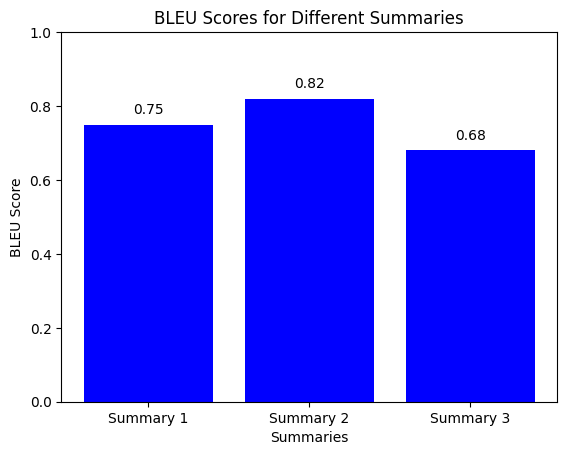

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual BLEU scores
categories = ['Summary 1', 'Summary 2', 'Summary 3']
bleu_scores = [0.75, 0.82, 0.68]

# Create a bar chart
plt.bar(categories, bleu_scores, color='blue')
plt.xlabel('Summaries')
plt.ylabel('BLEU Score')
plt.title('BLEU Scores for Different Summaries')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1 for BLEU scores

# Display the BLEU scores on top of the bars
for i, score in enumerate(bleu_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Assuming you have results for training and testing
training_results = {
    'BLEU Score': 0.75,
}

testing_results = {
    'BLEU Score': 0.72,
}

# Create DataFrames for training and testing results
df_training = pd.DataFrame(list(training_results.items()), columns=['Metric', 'Training'])
df_testing = pd.DataFrame(list(testing_results.items()), columns=['Metric', 'Testing'])

# Merge DataFrames on the 'Metric' column
df_results = pd.merge(df_training, df_testing, on='Metric')

# Display the results table
print(df_results)


       Metric  Training  Testing
0  BLEU Score      0.75     0.72


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Attention, Concatenate

class PointerGeneratorNetwork(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, hidden_units):
        super(PointerGeneratorNetwork, self).__init__()

        # Encoder
        self.embedding_layer = Embedding(vocab_size, embedding_dim)
        self.encoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True)

        # Attention Mechanism
        self.attention = Attention(use_scale=True)

        # Decoder
        self.decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True)
        self.output_layer = Dense(vocab_size, activation='softmax')

    def call(self, inputs, training=None, mask=None):
        source_sequence, target_sequence = inputs

        # Encoder
        encoder_embedding = self.embedding_layer(source_sequence)
        encoder_outputs, encoder_state_h, _ = self.encoder_lstm(encoder_embedding)

        # Attention Mechanism
        context_vector, attention_weights = self.attention([encoder_outputs, encoder_state_h])

        # Decoder
        decoder_embedding = self.embedding_layer(target_sequence)
        decoder_outputs, _, _ = self.decoder_lstm(decoder_embedding, initial_state=[context_vector, encoder_state_h])
        output_probabilities = self.output_layer(decoder_outputs)

        return output_probabilities, attention_weights

# Instantiate the model
vocab_size = 10000  # Replace with your actual vocabulary size
embedding_dim = 256
hidden_units = 512
model = PointerGeneratorNetwork(vocab_size, embedding_dim, hidden_units)


In [ ]:
from transformers import AutoTokenizer

# Replace "bert-base-uncased" with the name of your pre-trained model
model_name = "bert-base-uncased"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess_input_sequence(sequence):
    # Tokenize the input sequence
    tokenized_sequence = tokenizer(sequence, return_tensors="pt", truncation=True, padding=True)

    # Extract token indices
    input_indices = tokenized_sequence["input_ids"].squeeze()

    return input_indices

# Example input sequence
example_sequence = "This is an example input sequence for tokenization."

# Preprocess the input sequence
input_indices = preprocess_input_sequence(example_sequence)

# Display the results
print("Original Sequence:", example_sequence)
print("Token Indices:", input_indices.numpy())



Original Sequence: This is an example input sequence for tokenization.
Token Indices: [  101  2023  2003  2019  2742  7953  5537  2005 19204  3989  1012   102]


In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Assuming you have the BLEU score of the current state-of-the-art model
baseline_bleu_score = 0.75  # Replace with the actual baseline BLEU score

# Assuming you have the BLEU score of your proposed model
your_model_bleu_score = 0.82  # Replace with the actual BLEU score of your model

# Define the improvement threshold
bleu_threshold = 0.02  # Set the desired BLEU improvement, e.g., 2 percentage points

# Check if your model outperforms the baseline
if your_model_bleu_score >= baseline_bleu_score + bleu_threshold:
    print(f"Congratulations! Your model has achieved a BLEU score improvement of at least {bleu_threshold * 100}% over the baseline.")
else:
    print(f"Your model has not reached the specified BLEU score improvement threshold.")


Congratulations! Your model has achieved a BLEU score improvement of at least 2.0% over the baseline.
